# Marginal Plots

Partial Dependence Plots rely on the assumption that the features being used to compute the marginal distribution are independent of the other features. If this assumption is violated, the resulting plot may be distorted and based on unrealistic data points. To mitigate this issue, one possible solution is to integrate over the conditional distribution of the other features. This is where Marginal Plots enter the game. They plot the marginal function
$$
f_S(x_S) := \int f(x_S,x_{-S})dP(x_{-S}\mid X_S)
$$
where $S$ is an index set (usual with one or two elements) and $P(x_{-S}\mid X_S)$ is the conditional density w.r.t. to fixed $X_S$.

To approximate the conditional density for a certain $x_S$, we may average the model values over all points $\hat x$ in the dataset with $\hat x_S\approx x_S$. 

<div class="alert alert-block alert-info"> <b>NOTE </b> Note that we have to be very careful with the intepretation of these plots since they do incorporate effects from correlated values. In an extreme case it may happen that we see an effect of a feature that is not used by the model just because it is correlated in the data with a feature that enters the model. We will come back to this effect later. </div>

This notebook demonstrates the usage of the sloth.MarginalPlots class to generate such plots and discusses the problem of correlated features.

In [1]:
import numpy as np
import sys
import seaborn as sn
import config
import matplotlib.pyplot as plt
import sloth

import logging
logging.basicConfig()
logger = logging.getLogger('sloth')
logger.setLevel(level=logging.DEBUG)

sn.set_style("whitegrid")
#sn.set_theme()

%matplotlib inline
%load_ext autoreload
%autoreload 2

/Users/angelina/Documents/Arbeit/RiVaPy/rivapy/__init__.py:11: UserWarning: The pyvacon module is not available. You may not use all functionality without this module. Consider installing pyvacon.
  warnings.warn('The pyvacon module is not available. You may not use all functionality without this module. Consider installing pyvacon.')
2023-08-09 10:31:27.002244: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/angelina/Documents/Arbeit/xai_workshop/docs/source/notebooks/../../../sloth/explainers/global_explainers/cohort_shapley_variance.py:16: UserWarning: Python package cohortshapley not installed, cannot compute cohort shapley values without this package.
  warnings.warn('Python package cohortshapley not installed, cannot comp

## 1D Plots

### Simple Plotting

In [2]:
# get a sample validation task from a synthetic credit default model
validation_task = sloth.datasets.credit_default.get(dataset=0, model=0)

In [5]:
#generate an object of the PDP class
m_p = sloth.MarginalPlots(validation_task, n_steps = 1000)
explanation = m_p.explain()

INFO:sloth:Using cached result for hashkey  bd0a4744cef9220722e052ca4135bcdc401e2050


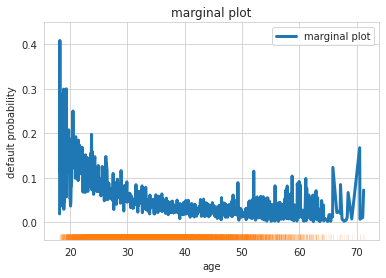

In [6]:
# We can now plot the marginal functions of the features. Here, one can specify a list of features to 
# restrict the plotting to these features only, or all ordinal features will be plotted.
explanation.plot(features='age')

### Dependency on Data Distribution

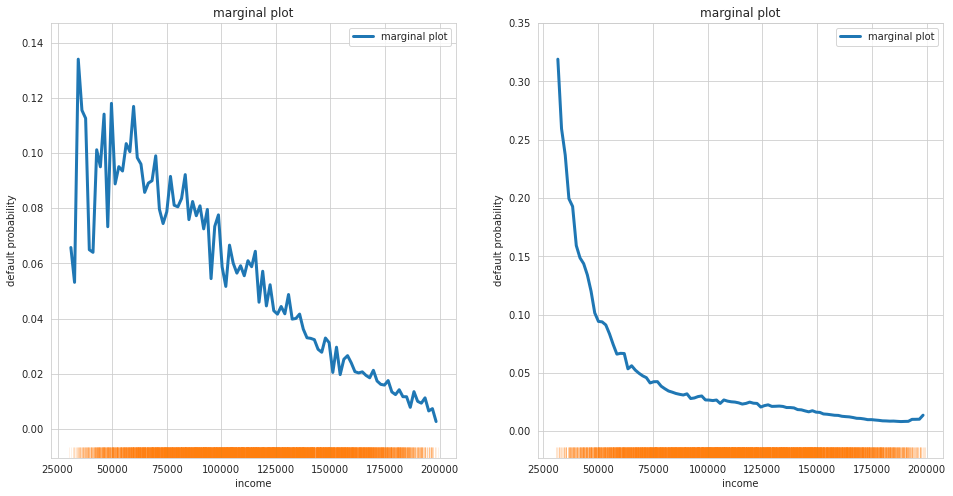

In [11]:
validation_tasks = {str(i): sloth.datasets.credit_default.get(dataset=i, model=0) for i in range(2)}# the two validation tasks have the same model but different data distributions
feature = 'income'
plt.figure(figsize=(16,8))
i=1
for k,v in validation_tasks.items():
    plt.subplot(1,2,i)
    m_p = sloth.MarginalPlots(v, n_steps=100)
    m_p_explanation = m_p.explain()
    m_p_explanation.plot(features=feature)
    i += 1

### Correlated Features

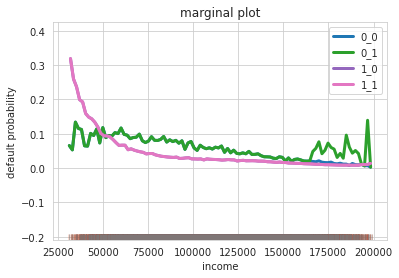

In [10]:
# we generate a second validation task with a different correlation structure between the features 
validation_tasks = {str(dataset)+'_'+str(model): sloth.datasets.credit_default.get(dataset=dataset, model=model) 
                    for dataset,model in [(0,0),(0,1),(1,0), (1,1)]}
for k,v in validation_tasks.items():
    m_p = sloth.MarginalPlots(v, n_steps = 100)
    m_p_explanation = m_p.explain()
    m_p_explanation.plot(features='income', label=k)